<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/TU_Dortmund/blob/main/ASL_Sheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1: Overfitting and Underfitting: Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load training data
data = pd.read_csv('regr_train.csv')
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

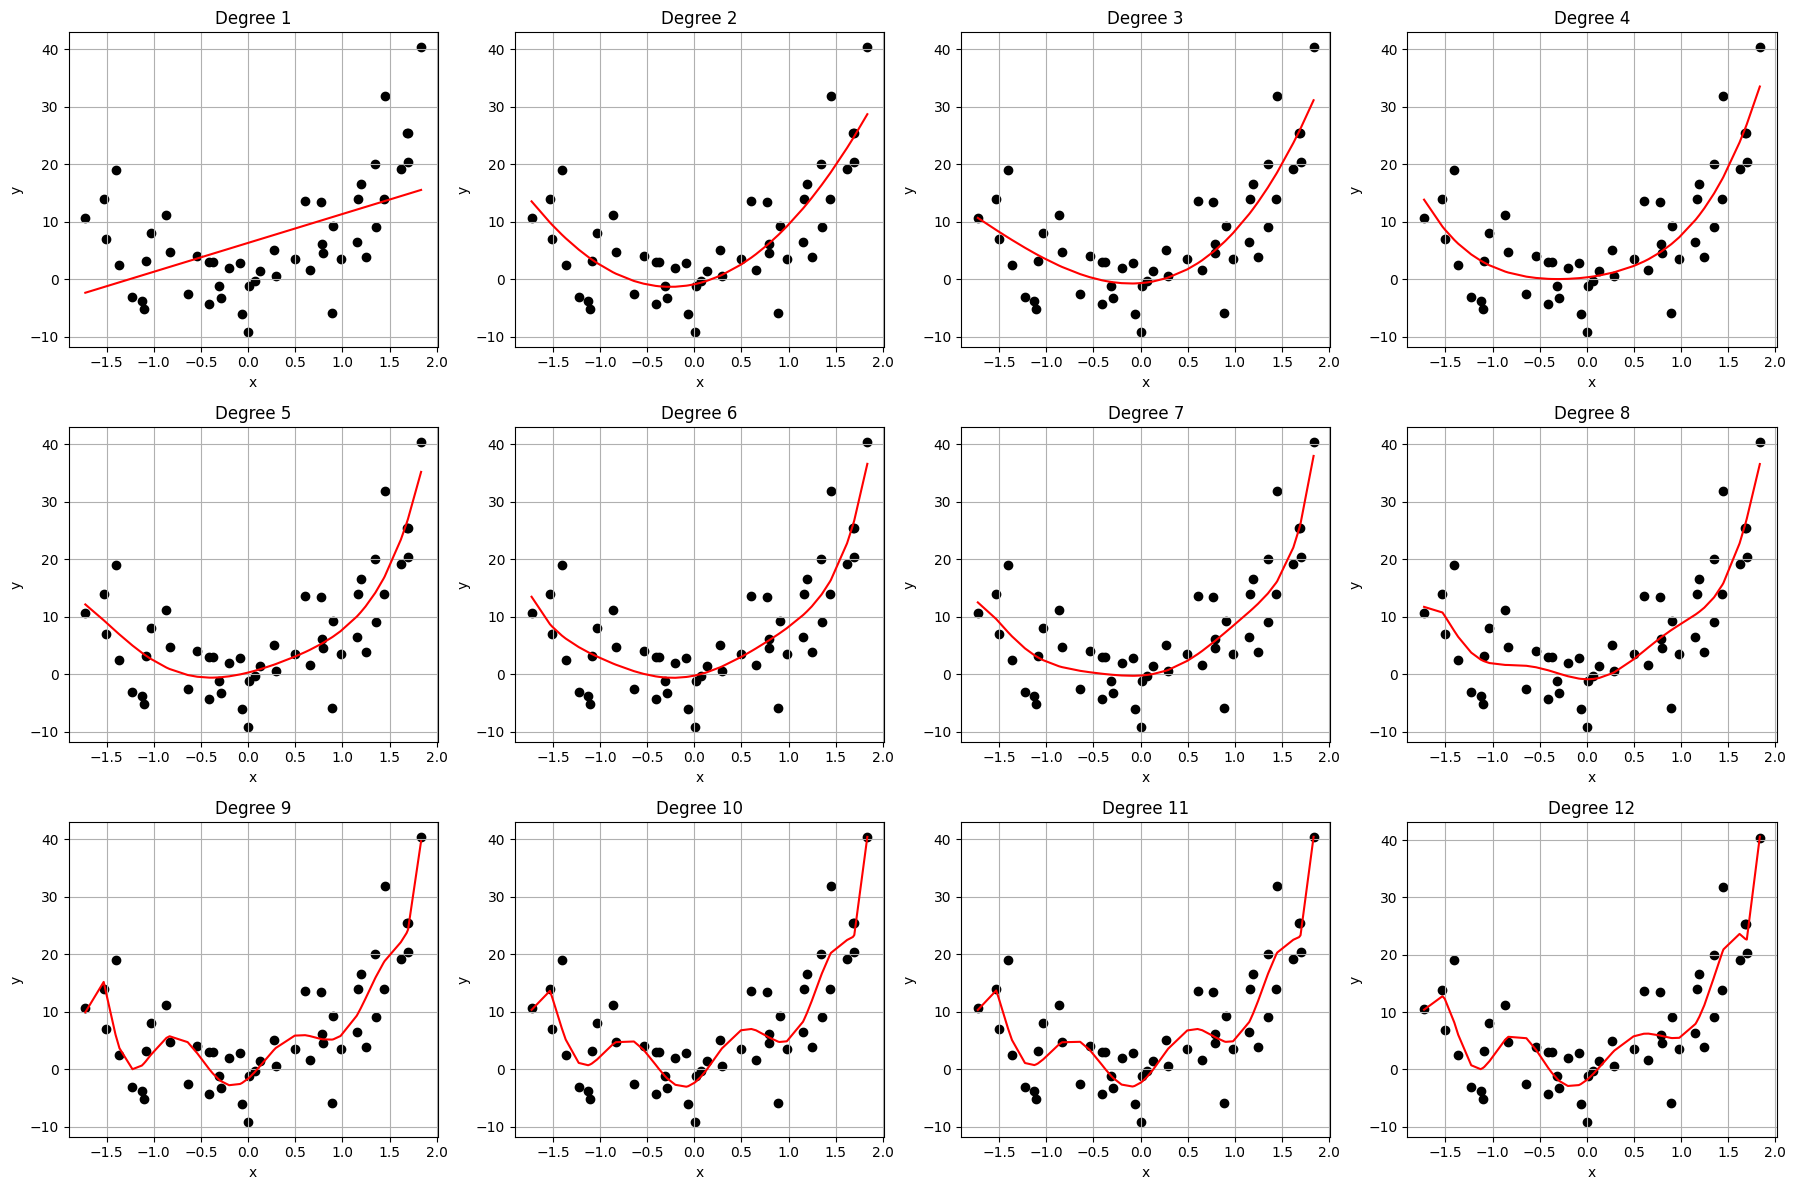

In [2]:
degrees = range(1, 13)
models = []

plt.figure(figsize=(18, 12))
for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d, include_bias=True)
    X_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    models.append((d, model, poly, y_pred))

    # Plot
    plt.subplot(3, 4, i)
    plt.scatter(x, y, label="Training data", color='black')
    plt.plot(np.sort(x, axis=0), model.predict(poly.transform(np.sort(x, axis=0))), color='red')
    plt.title(f"Degree {d}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
# Load test data
test_data = pd.read_csv("regr_test.csv")
x_test = test_data['x'].values.reshape(-1, 1)
y_test = test_data['y'].values

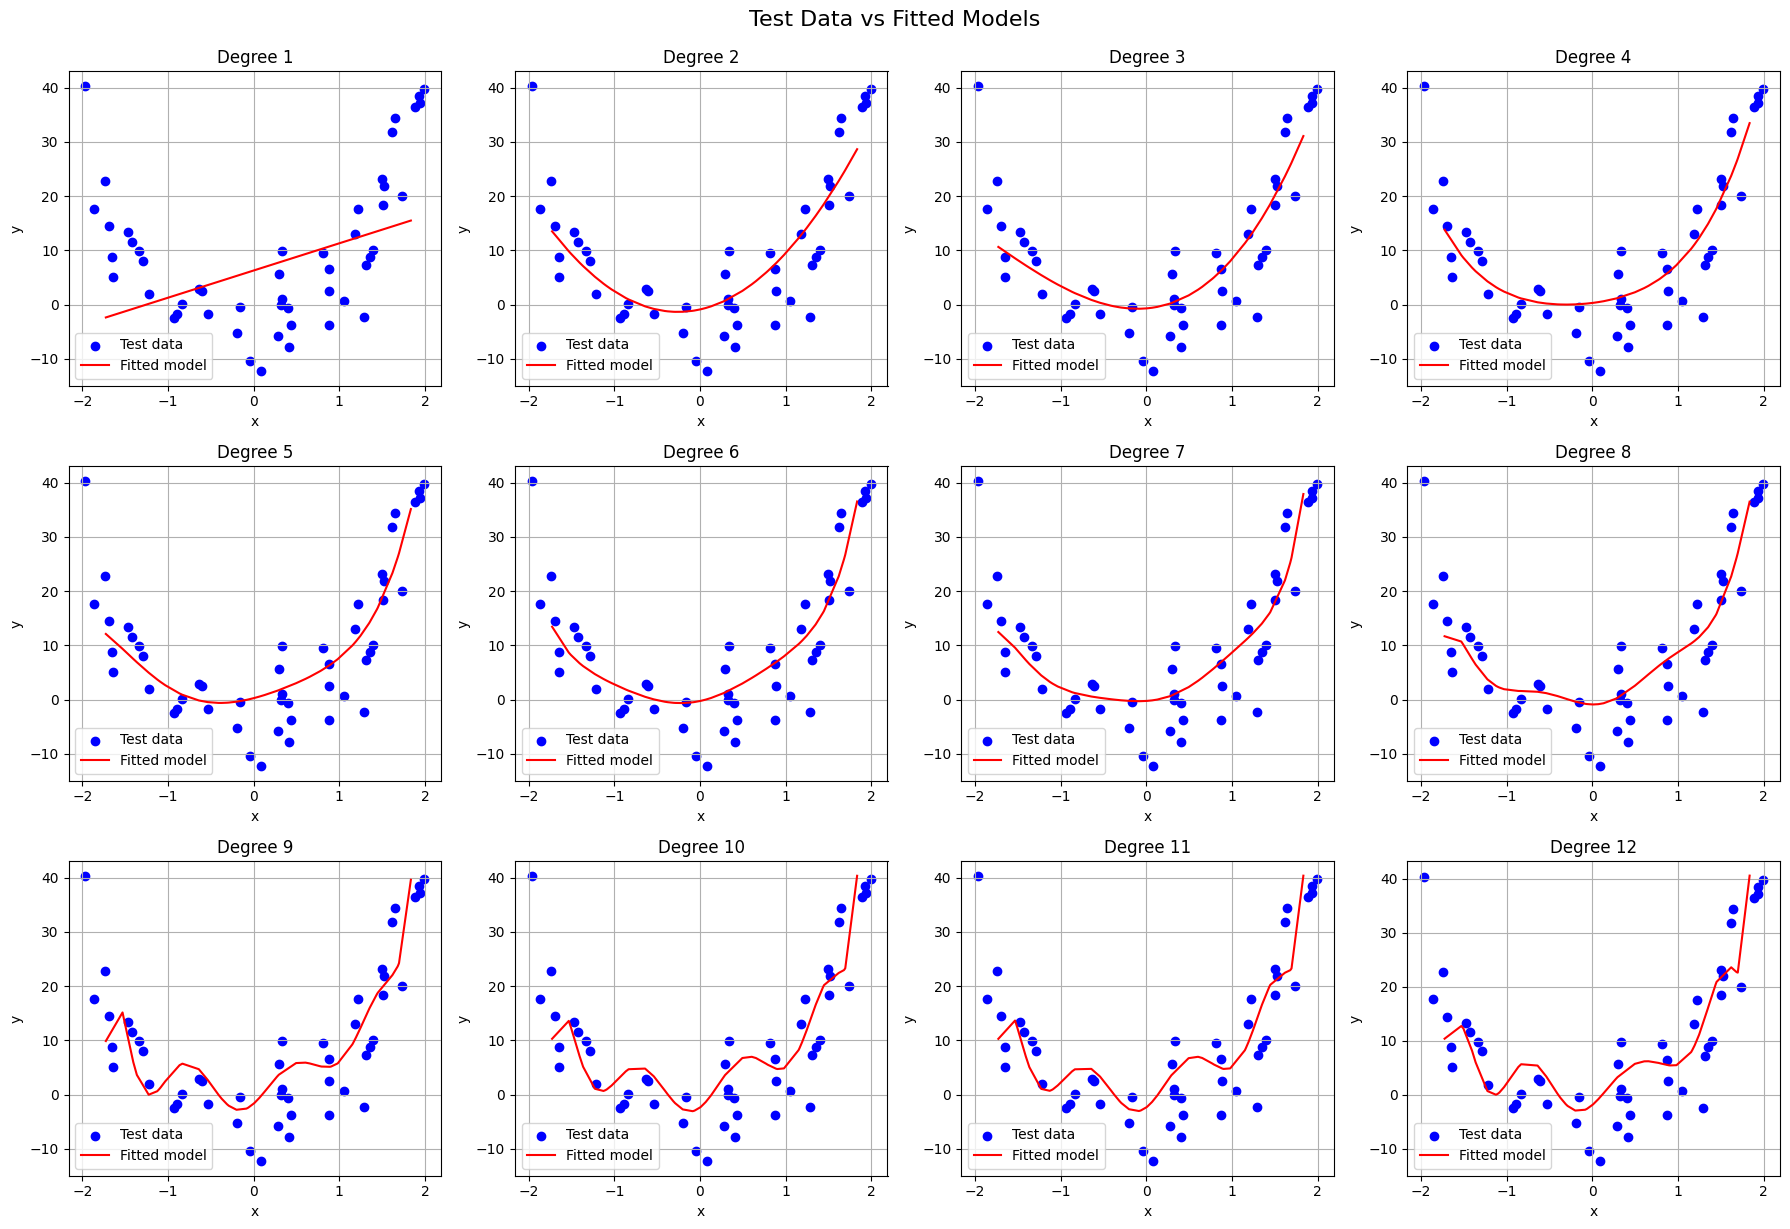

In [5]:
plt.figure(figsize=(18, 12))
for i, (d, model, poly, _) in enumerate(models, 1):
    plt.subplot(3, 4, i)
    plt.scatter(x_test, y_test, label='Test data', color='blue')
    x_sorted = np.sort(x, axis=0)
    plt.plot(x_sorted, model.predict(poly.transform(x_sorted)), color='red', label='Fitted model')
    plt.title(f"Degree {d}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Test Data vs Fitted Models", y=1.02, fontsize=16)
plt.show()

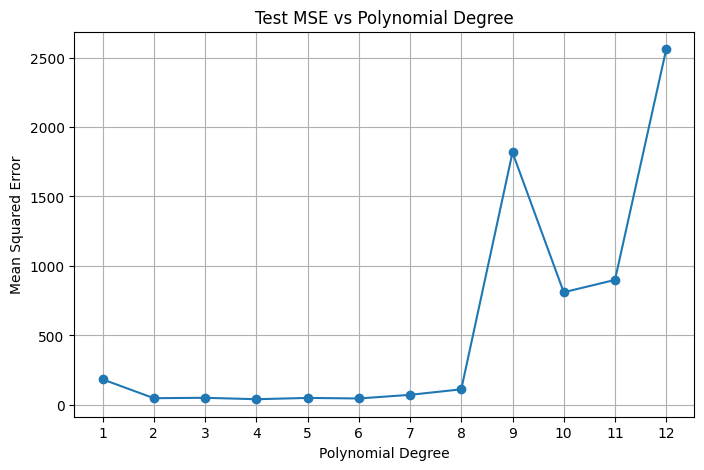

    Degree     Test MSE
0        1   183.641401
1        2    47.951063
2        3    50.863013
3        4    40.534139
4        5    49.908806
5        6    45.905565
6        7    72.121504
7        8   111.779997
8        9  1816.930268
9       10   810.445485
10      11   899.452555
11      12  2559.824403


In [6]:
# Compute test MSEs
test_errors = []
for d, model, poly, _ in models:
    X_test_poly = poly.transform(x_test)
    y_pred_test = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred_test)
    test_errors.append((d, mse))

# Convert to DataFrame
df_errors = pd.DataFrame(test_errors, columns=["Degree", "Test MSE"])

# Plot test MSE vs degree
plt.figure(figsize=(8, 5))
plt.plot(df_errors["Degree"], df_errors["Test MSE"], marker='o')
plt.title("Test MSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.xticks(df_errors["Degree"])
plt.show()

# Display error table
print(df_errors)

#Exercise 2: Overfitting and Underfitting: Classification

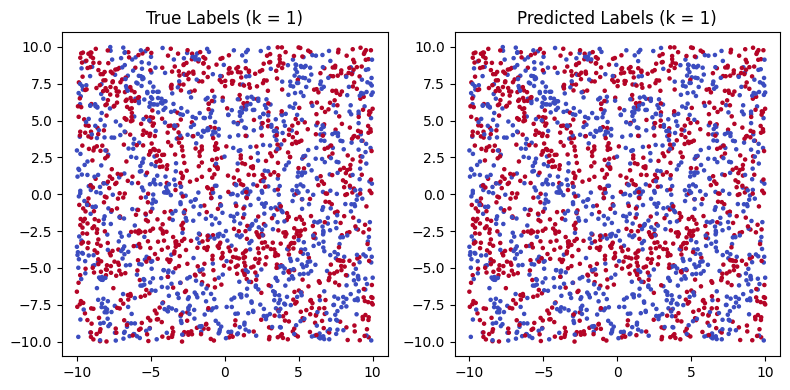

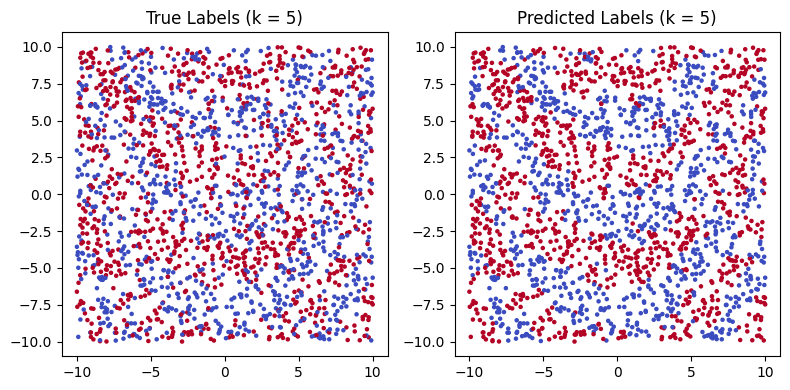

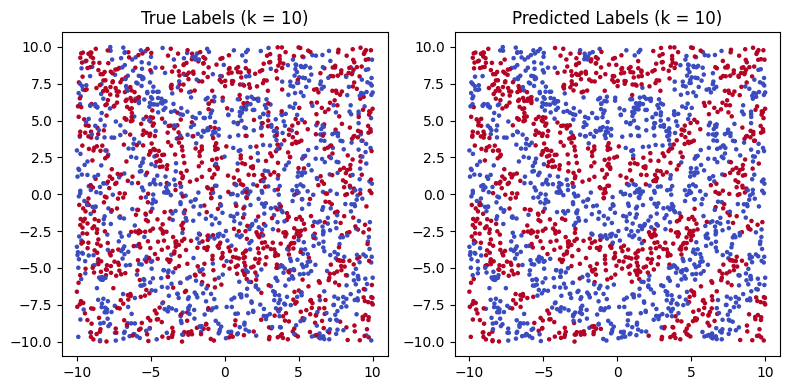

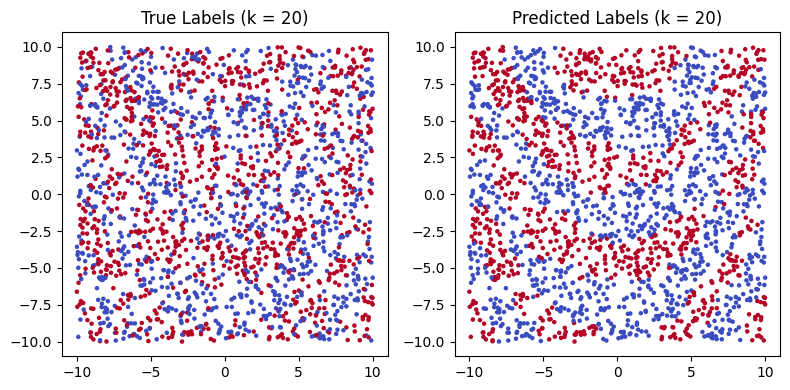

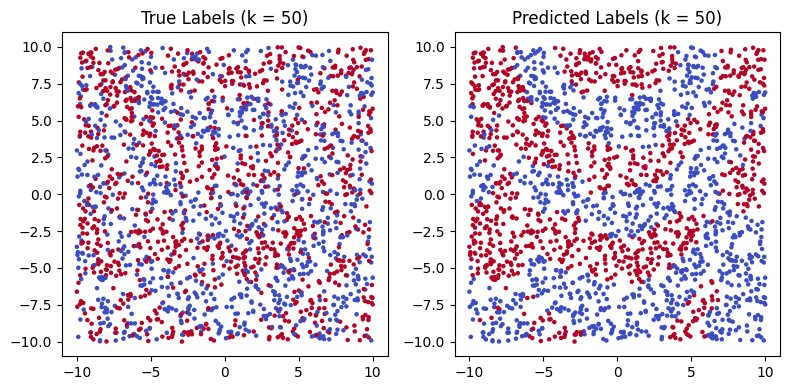

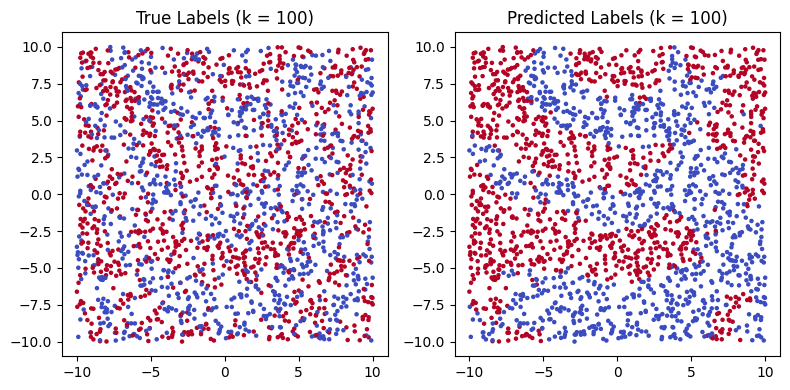

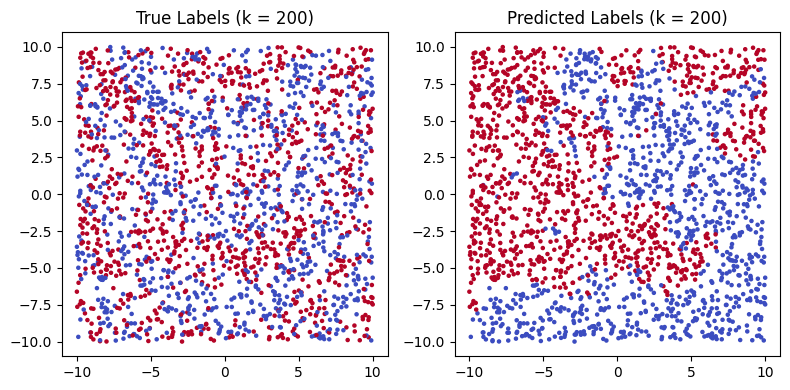

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = pd.read_csv("dat_class.csv")
X = data[['x1', 'x2']].values
y = data['y'].values

k_values = [1, 5, 10, 20, 50, 100, 200]

# Plotting function
def plot_true_vs_pred(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)

    plt.figure(figsize=(8, 4))

    # True class
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=5)
    plt.title(f"True Labels (k = {k})")

    # Predicted class
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=5)
    plt.title(f"Predicted Labels (k = {k})")

    plt.tight_layout()
    plt.show()

# Loop through k-values and plot
for k in k_values:
    plot_true_vs_pred(k)

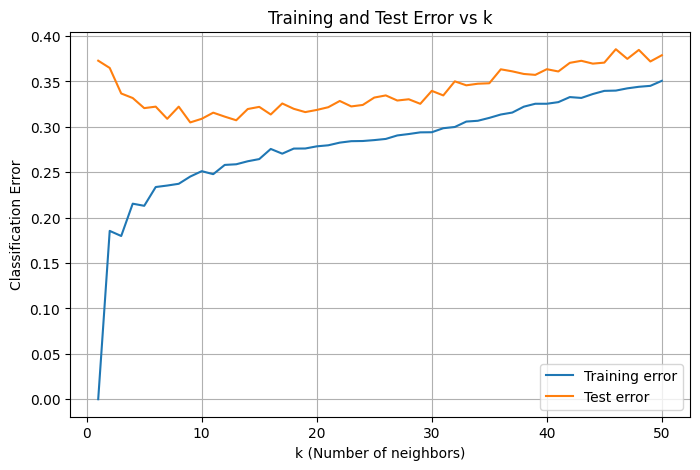

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

ks = range(1, 51)
train_errors = []
test_errors = []

# Repeat 20 times for averaging
n_repeats = 20
rng = np.random.RandomState(0)

for k in ks:
    train_err_k = []
    test_err_k = []

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Train error on full training set
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_err_k.append(zero_one_loss(y_train, y_train_pred))
        test_err_k.append(zero_one_loss(y_test, y_test_pred))

    train_errors.append(np.mean(train_err_k))
    test_errors.append(np.mean(test_err_k))

# Plot errors
plt.figure(figsize=(8, 5))
plt.plot(ks, train_errors, label='Training error')
plt.plot(ks, test_errors, label='Test error')
plt.xlabel('k (Number of neighbors)')
plt.ylabel('Classification Error')
plt.title('Training and Test Error vs k')
plt.legend()
plt.grid(True)
plt.show()

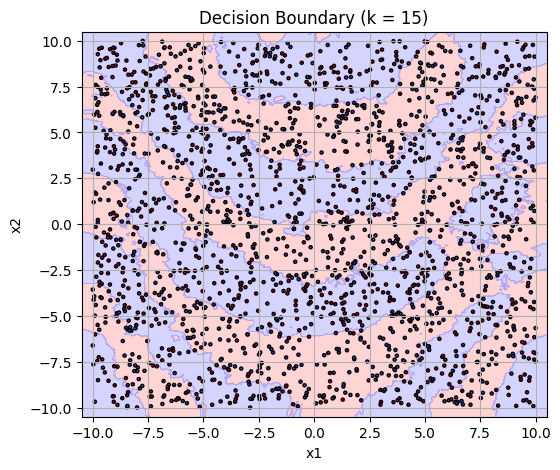

In [9]:
from matplotlib.colors import ListedColormap

best_k = 15  # Pick based on lowest test error
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

# Create grid
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                     np.linspace(x2_min, x2_max, 500))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=5, edgecolor='k')
plt.title(f"Decision Boundary (k = {best_k})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

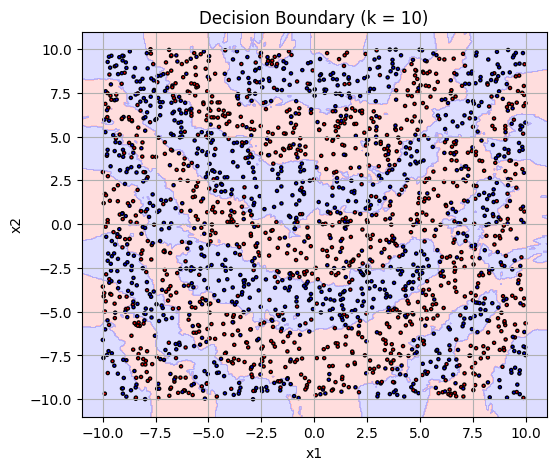

In [10]:
# Fit model with best k
best_k = 10
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

# Grid for visualization
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                     np.linspace(x2_min, x2_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 5))
cmap_bg = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_pts = ListedColormap(['red', 'blue'])

plt.contourf(xx, yy, Z, cmap=cmap_bg, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_pts, s=5, edgecolor='k')
plt.title(f"Decision Boundary (k = {best_k})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()